In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_data=pd.read_csv("train_lyst1720633824458.csv")

In [3]:
train_data.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [4]:
train_data.shape

(14999, 9)

In [5]:
#converting categorical values of field category into numerical

In [6]:
category={'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
train_data["category"]=train_data["category"].map(category)
train_data.head()


,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


In [7]:
train_data=train_data[train_data.views!='F']
train_data=train_data[train_data.likes!='F']
train_data=train_data[train_data.dislikes!='F']
train_data=train_data[train_data.comment!='F']

In [8]:
train_data["views"]=pd.to_numeric(train_data["views"])
train_data["likes"]=pd.to_numeric(train_data["likes"])
train_data["dislikes"]=pd.to_numeric(train_data["dislikes"])
train_data["comment"]=pd.to_numeric(train_data["comment"])

In [9]:
#day2

In [10]:
column_vidid=train_data['vidid']

In [11]:
#encoding features like categoty,duration,vidid

In [12]:
from sklearn.preprocessing import LabelEncoder
train_data['duration']=LabelEncoder().fit_transform(train_data['duration'])
train_data['vidid']=LabelEncoder().fit_transform(train_data['vidid'])
train_data['published']=LabelEncoder().fit_transform(train_data['published'])
train_data.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,6
1,2741,2,1707,56,2,6,2185,3040,4
2,8138,1,2023,25,0,2,2094,1863,3
3,9005,6,620860,777,161,153,2119,2546,8
4,122,1,666,1,0,0,2091,1963,4


In [13]:
import datetime
import time
def checki(x):
    y = x[2:]
    h = ''
    m = ''
    s = ''
    mm = ''
    P = ['H','M','S']
    for i in y:
        if i not in P:
            mm+=i
        else:
            if(i=="H"):
                h = mm
                mm = ''
            elif(i == "M"):
                m = mm
                mm = ''
            else:
                s = mm
                mm = ''
    if(h==''):
        h = '00'
    if(m == ''):
        m = '00'
    if(s==''):
        s='00'
    bp = h+':'+m+':'+s
    return bp
train=pd.read_csv("train_lyst1720633824458.csv")
mp = pd.read_csv("train_lyst1720633824458.csv")["duration"]
time = mp.apply(checki)

def func_sec(time_string):
    h, m, s = time_string.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)
time1=time.apply(func_sec)
train_data["duration"]=time1
train_data.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,457,6
1,2741,2,1707,56,2,6,2185,570,4
2,8138,1,2023,25,0,2,2094,136,3
3,9005,6,620860,777,161,153,2119,262,8
4,122,1,666,1,0,0,2091,31,4


In [14]:
#visualisation

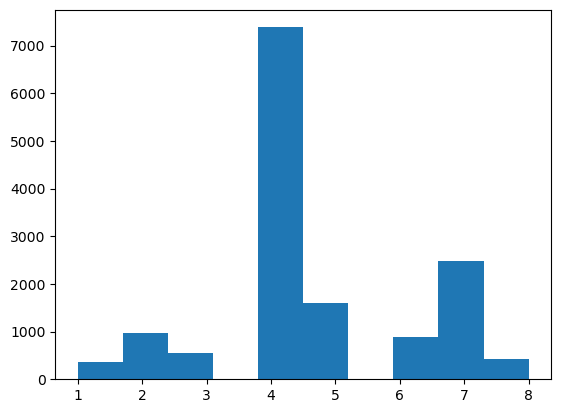

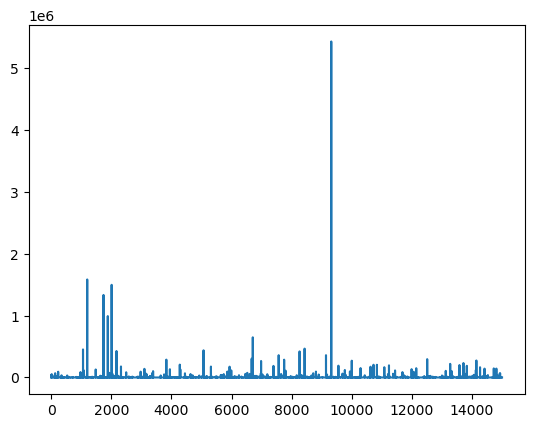

In [15]:

plt.hist(train_data["category"])
plt.show()
plt.plot(train_data["adview"])
plt.show()

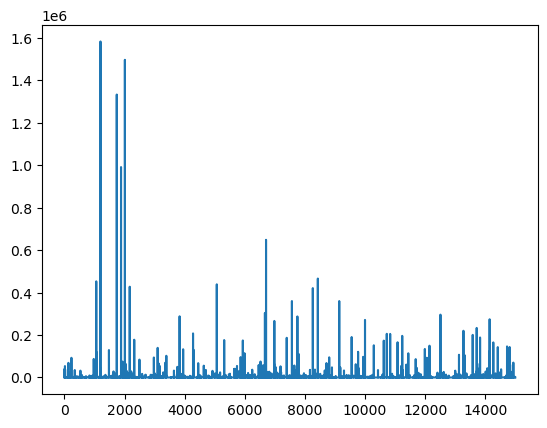

In [16]:
# Remove videos with adview greater than 2000000 as outlier
train_data = train_data[train_data["adview"] <2000000]
plt.plot(train_data["adview"])
plt.show()

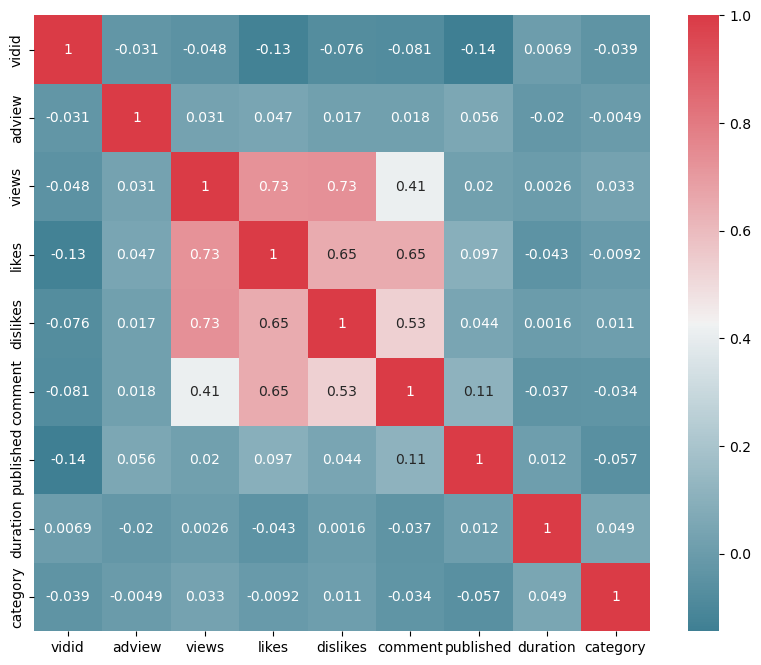

In [17]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(10, 8))
corr = train_data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot=True)
plt.show()


In [18]:
#splitting

In [19]:
y_train=pd.DataFrame(data=train_data.iloc[:,1].values,columns=['target'])
train_data=train_data.drop(["adview"],axis=1)
train_data=train_data.drop(["vidid"],axis=1)
train_data.head()

,views,likes,dislikes,comment,published,duration,category
0,1031602,8523,363,1095,2168,457,6
1,1707,56,2,6,2185,570,4
2,2023,25,0,2,2094,136,3
3,620860,777,161,153,2119,262,8
4,666,1,0,0,2091,31,4


In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train_data,y_train,test_size=0.2,random_state=42)
x_train.shape

(11708, 7)

In [21]:
x_train

,views,likes,dislikes,comment,published,duration,category
13440,86739,117,9,4,1217,180,4
9523,1419766,887,362,232,1547,5811,7
3012,26086,19,0,9,966,178,6
1888,305445,3662,45,555,1484,257,7
11378,737649,1702,96,53,1127,895,4
...,...,...,...,...,...,...,...
5316,31648,140,24,14,1925,231,7
13748,1804,4,1,0,1049,232,4
5522,204817,86,35,11,1237,218,4
883,1361366,1384,757,185,2145,240,7


In [22]:
#Normalize
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
x_train=scalar.fit_transform(x_train)
x_test=scalar.fit_transform(x_test)

In [23]:
x_train

array([[6.27970800e-04, 4.12227296e-04, 1.82005703e-04, ...,
        5.10700797e-01, 4.25360966e-03, 4.28571429e-01],
       [1.02842406e-02, 3.12517617e-03, 7.32067383e-03, ...,
        6.49181704e-01, 1.37320699e-01, 8.57142857e-01],
       [1.88608556e-04, 6.69428942e-05, 0.00000000e+00, ...,
        4.05371381e-01, 4.20634733e-03, 7.14285714e-01],
       ...,
       [1.48331209e-03, 3.03004679e-04, 7.07799956e-04, ...,
        5.19093580e-01, 5.15159392e-03, 4.28571429e-01],
       [9.86119882e-03, 4.87626135e-03, 1.53087019e-02, ...,
        9.00125892e-01, 5.67147955e-03, 8.57142857e-01],
       [2.87646701e-04, 4.29843847e-04, 1.21337135e-04, ...,
        9.39991607e-02, 8.36543233e-03, 4.28571429e-01]])

In [ ]:
#evaluation metrics

In [28]:
from sklearn import metrics
def print_error(x_test,y_test,model_name):
    prediction=model_name.predict(x_test)
    print("mean absolute error:",metrics.mean_absolute_error(y_test,prediction))
    print("mean squared error:",metrics.mean_squared_error(y_test,prediction))
    print("root mean square error:",np.sqrt(metrics.mean_squared_error(y_test,prediction)))

In [29]:
#linear regression
from sklearn import linear_model
linear_regression=linear_model.LinearRegression()
linear_regression.fit(x_test,y_test)
print("linear regression")
print_error(x_test,y_test,linear_regression)

linear regression
mean absolute error: 3673.5305026872693
mean squared error: 826787142.2612468
root mean square error: 28753.906556522834


In [30]:
#svr
from sklearn.svm import SVR
support_vector_regression=SVR()
support_vector_regression.fit(x_test,y_test)
print("support vector regression")
print_error(x_test,y_test,support_vector_regression)

C:\Users\seera\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


support vector regression
mean absolute error: 1696.9774321566313
mean squared error: 833686348.6453834
root mean square error: 28873.62721663808


In [31]:
#decision tree regressor
from sklearn.tree import DecisionTreeRegressor
decision_tree=DecisionTreeRegressor()
decision_tree.fit(x_test,y_test)
print("decision tree regressor")
print_error(x_test,y_test,decision_tree)

decision tree regressor
mean absolute error: 0.0
mean squared error: 0.0
root mean square error: 0.0


In [34]:
!pip install joblib

In [35]:
 #Saving Scikitlearn models 
import joblib 
joblib.dump(decision_tree, "decisiontree_youtubeadview.pkl") 

['decisiontree_youtubeadview.pkl']